[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91996\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


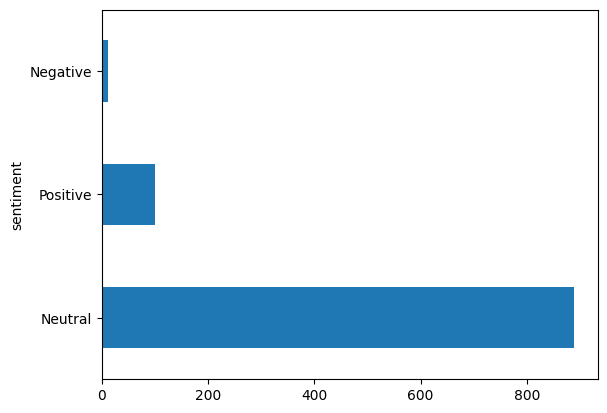

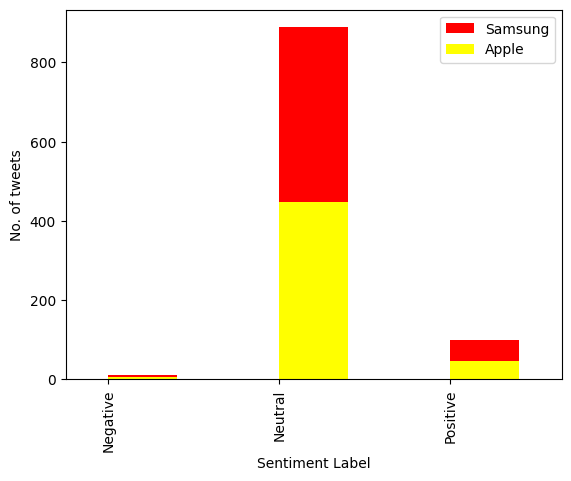

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

import string
def preprocess(t):
  w = word_tokenize(t.lower())
  data = list()
  for word in w:
    if word.lower() not in stop_words:
      data.append(word)
  text = ' '.join(data)
  return text.translate(str.maketrans('','',string.punctuation))


from textblob import TextBlob
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

samsung = pd.read_csv('samsung.csv')
samsung.head()

samsung['comment_text'] = samsung['comment_text'].apply(preprocess)
samsung['subjectivity'] = samsung['comment_text'].apply(get_subjectivity)
samsung['polarity'] = samsung['comment_text'].apply(get_polarity)
samsung.head()

threshold = 0.5
samsung['sentiment'] = samsung['polarity'].apply(lambda x:'Positive' if x >= threshold else('Negative' if x< -threshold else 'Neutral'))
samsung['sentiment'].value_counts().plot.barh()

apple = pd.read_csv('apple.csv')
apple.head()

apple['comment_text'] = apple['comment_text'].apply(preprocess)
apple['subjectivity'] = apple['comment_text'].apply(get_subjectivity)
apple['polarity'] = apple['comment_text'].apply(get_polarity)
apple.head()

threshold = 0.5
apple['sentiment'] = apple['polarity'].apply(lambda x:'Positive' if x >= threshold else('Negative' if x< -threshold else 'Neutral'))
apple['sentiment'].value_counts().plot.barh()

samsung_sentiments = samsung.groupby('sentiment')['sentiment'].count()
samsung_sentiments

apple_sentiments = apple.groupby('sentiment')['sentiment'].count()
apple_sentiments

colors = ['Red','Yellow','blue']
fig,ax = plt.subplots()
samsung_sentiments.plot(kind='bar',ax=ax,position=0,width=0.4,label='Samsung',color=colors[0])
apple_sentiments.plot(kind='bar',ax=ax,position=0,width=0.4,label='Apple',color=colors[1])
ax.set_xlabel('Sentiment Label')
ax.set_ylabel('No. of tweets')
ax.legend()
plt.show()